In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [406]:
df = pd.read_csv('employee_data.csv')

In [407]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [408]:
df.sample(6)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
10014,270,sales,NaN,0.892215,6,NaN,low,0.075724,Left,4.0
5750,100,engineering,1.0,0.555942,4,NaN,low,0.518917,Employed,4.0
12698,265,IT,NaN,0.838128,5,NaN,low,0.694369,Employed,3.0
8308,204,marketing,NaN,0.637365,4,NaN,medium,0.541818,Employed,4.0
2440,206,NaN,NaN,0.852079,3,NaN,medium,0.509153,Employed,4.0
5274,244,IT,NaN,1.000000,6,NaN,medium,0.271733,Employed,3.0


In [409]:
df.shape

(14249, 10)

In [410]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [411]:
df.drop_duplicates(inplace=True)
df.shape

(14221, 10)

In [412]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [413]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12165
last_evaluation       1504
n_projects               0
recently_promoted    13921
salary                   0
satisfaction           153
status                   0
tenure                 153
dtype: int64

In [414]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


In [415]:
df['filed_complaint'].replace(np.nan, 0, inplace=True)
df['recently_promoted'].replace(np.nan, 0, inplace=True)

In [416]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


In [417]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1504
n_projects              0
recently_promoted       0
salary                  0
satisfaction          153
status                  0
tenure                153
dtype: int64

In [418]:
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [419]:
df['department'].replace('information_technology', 'IT', inplace=True)

In [420]:
df = df[df['department'] != 'temp']

In [421]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [422]:
df['department'].fillna('missing', inplace=True)

In [423]:
df['eval_missing'] = df['last_evaluation'].isnull().astype(int)

In [425]:
df['last_evaluation'].fillna(0, inplace=True)

In [426]:
df.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
eval_missing         0
dtype: int64

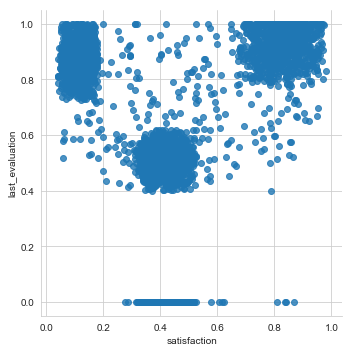

In [439]:
#plt = plt.figure(figsize=(8,10))
sns.lmplot(x='satisfaction', y='last_evaluation', data = df[df['status']=='Left'], fit_reg=False)

In [440]:
df['unhappy'] = (df['satisfaction'] < 0.2).astype(int)

In [442]:
df['underperformer'] = ((df['last_evaluation'] < 0.6) & (df['eval_missing'] == 0)).astype(int)

In [443]:
df['overachiever'] = ((df['last_evaluation'] > 0.8) & (df['satisfaction'] > 0.65)).astype(int)

In [444]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,eval_missing,unhappy,underperformer,overachiever
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0,0,0,1
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,1,0,0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0,0,0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0,0,1,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0,0,0,1


In [447]:
status_mapping = {'Left' : 1, 'Employed' : 0}

df['status'] = df['status'].map(status_mapping)

In [448]:
categorical_features = ['department', 'salary']

df = pd.get_dummies(df, columns = categorical_features)

In [449]:
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,eval_missing,unhappy,...,department_management,department_marketing,department_missing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [452]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [453]:
y = df['status']
X = df.drop('status', axis=1)

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = df.status)

In [456]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10551, 25), (3517, 25), (10551,), (3517,))

In [471]:
pipelines = {
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
#    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
}

In [458]:
pipelines['rf'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('randomforestclassifier',
   RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
               oob_score=False, random_state=123, verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=

In [459]:
pipelines['gb'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('gradientboostingclassifier',
   GradientBoostingClassifier(criterion='friedman_mse', init=None,
                 learning_rate=0.1, loss='deviance', max_depth=3,
                 max_features=None, max_leaf_nodes=None,
                 min_impurity_decrease=0.0, min_impurity_split=None,
                 min_samples_leaf=1, min_samples_split=2,
                 min_weight_fraction_leaf=0.0, n_estimators=100,
                 n_iter_no_change=None, presort='auto', random_state=123,
                 subsample=1.0, tol=0.0001, validation_fraction=0.1,
                 verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'gradientboostingclassifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes

In [474]:
rf_hyperparametrs = {
    'randomforestclassifier__n_estimators' : [70,85,100],
    'randomforestclassifier__max_features' : [0.80,0.66,0.33]
}

#gb_hyperparametrs = {
#    'gradientboostingclassifier__n_estimators' : [100,150,200],
#    'gradientboostingclassifier__max_depth' : [1,2,3,4,5],
#    'gradientboostingclassifier__learning_rate' : [0.05, 0.1,0.2]
#}

In [475]:
hyperparameters = {
    'rf' : rf_hyperparametrs,
#    'gb' : gb_hyperparametrs
}

In [476]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    
    print('{0} has been fitted'.format(name))

rf has been fitted


In [478]:
for name, model in fitted_models.items():
    print(name, ", Score: ", model.best_score_, ", Params:", model.best_params_)

rf , Score:  0.9785802293621457 , Params: {'randomforestclassifier__max_features': 0.33, 'randomforestclassifier__n_estimators': 70}


In [479]:
for name, model in fitted_models.items():
    predict = model.predict(X_test)

In [480]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.9798123400625534